# 2.MODEL EVALUATION AND COMPARISION
 Evaluating the performance of AI models is crucial for determining
 their effectiveness in solving a particular problem. This task
 involves implementing and comparing different AI models using
 appropriate evaluation metrics.

--- Logistic Regression Evaluation ---
Accuracy: 0.7403
Precision: 0.6351
Recall: 0.5875
F1 Score: 0.6104
ROC-AUC Score: 0.7043
Confusion Matrix:
[[124  27]
 [ 33  47]]


--- Random Forest Evaluation ---
Accuracy: 0.7576
Precision: 0.6395
Recall: 0.6875
F1 Score: 0.6627
ROC-AUC Score: 0.7411
Confusion Matrix:
[[120  31]
 [ 25  55]]



Model Comparison:

                     Accuracy  Precision  Recall  F1 Score   ROC-AUC
Logistic Regression  0.740260   0.635135  0.5875  0.610390  0.704346
Random Forest        0.757576   0.639535  0.6875  0.662651  0.741101


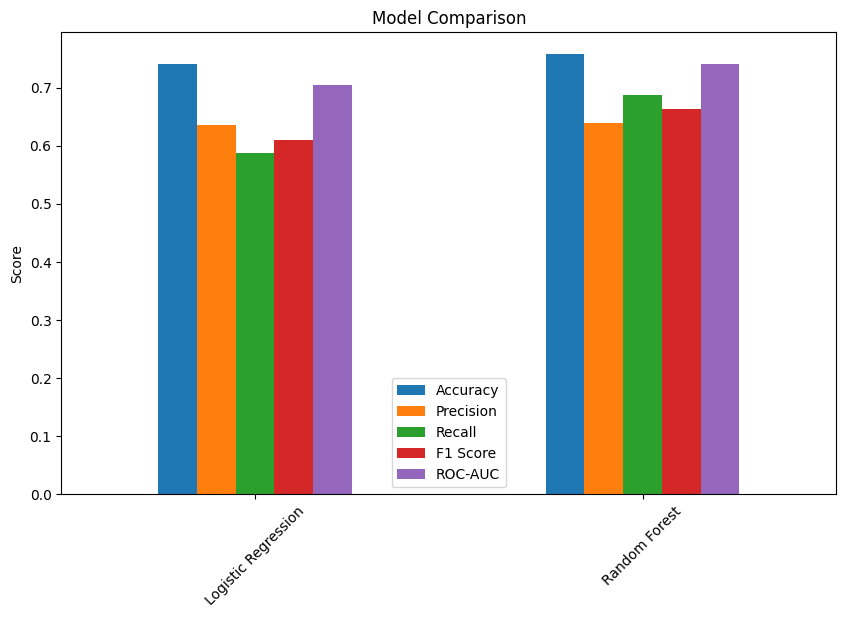

In [4]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the data (as in Task One)
df = pd.read_csv('diabetes.csv')
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# Handling missing values
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

# Feature Scaling
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Train and Compare Models

# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 3: Evaluate the Models

# Function to print evaluation metrics for a model
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("\n")

# Evaluate Logistic Regression Model
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Random Forest Model
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Step 4: Comparison based on metrics
# You can compare accuracy, F1-score, ROC-AUC scores, etc.
# Step 4: Store metrics and compare models

# Function to return the evaluation metrics as a dictionary
def get_metrics(y_true, y_pred):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_pred)
    }
    return metrics

# Get metrics for both models
logreg_metrics = get_metrics(y_test, y_pred_logreg)
rf_metrics = get_metrics(y_test, y_pred_rf)

# Create a comparison table
comparison_df = pd.DataFrame([logreg_metrics, rf_metrics], index=['Logistic Regression', 'Random Forest'])

# Print the comparison table
print("\nModel Comparison:\n")
print(comparison_df)

# Optional: Visualize the comparison using a bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), title='Model Comparison', rot=0)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
